In [1]:
# Import the required modules
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Load the Credit Card Data into a Pandas DataFrame

In [3]:
# Read in the CSV file as a pandas Dataframe
ccinfo_df = pd.read_csv("./Resources/cc_info_default.csv")

# Review the first five rows of the DataFrame
display(ccinfo_df.head())
# Review the last five rows of the DataFrame
display(ccinfo_df.tail())

,limit_bal,education,marriage,age,bill_amt,pay_amt,default
0,20000,secondary,yes,24,7704,689,1
1,120000,secondary,no,26,17077,5000,1
2,90000,secondary,no,34,101653,11018,0
3,50000,secondary,yes,37,231334,8388,0
4,50000,secondary,yes,57,109339,59049,0


,limit_bal,education,marriage,age,bill_amt,pay_amt,default
4994,20000,secondary,yes,36,110994,7293,0
4995,180000,other,yes,34,35240,22066,0
4996,200000,secondary,yes,45,691806,21443,1
4997,310000,post-grad,yes,44,1548067,72000,0
4998,160000,primary,no,40,4440,3725,0


In [4]:
# Review the info of the DataFrame
ccinfo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   limit_bal  4999 non-null   int64 
 1   education  4999 non-null   object
 2   marriage   4999 non-null   object
 3   age        4999 non-null   int64 
 4   bill_amt   4999 non-null   int64 
 5   pay_amt    4999 non-null   int64 
 6   default    4999 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 273.5+ KB


## Data Preprocessing
---
###  Transform "education" column with get_dummies

In [5]:
# Verify the categories of the "education" column
ccinfo_df['education'].value_counts()

education
secondary    2267
primary      1862
post-grad     822
other          48
Name: count, dtype: int64

In [8]:
# Transform the education column using get_dummies
encoded_ed = pd.get_dummies(ccinfo_df['education'], dtype=int)

# Display the last five rows of the transformed data
encoded_ed.head()

,other,post-grad,primary,secondary
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [9]:
# Concatenate the df_shopping_transformed and the card_dummies DataFrames
ccinfo_df = pd.concat([ccinfo_df, encoded_ed], axis=1)

# Drop the original education column
ccinfo_df = ccinfo_df.drop(columns=['education'])

# Display the DataFrame
ccinfo_df.head()

,limit_bal,marriage,age,bill_amt,pay_amt,default,other,post-grad,primary,secondary
0,20000,yes,24,7704,689,1,0,0,0,1
1,120000,no,26,17077,5000,1,0,0,0,1
2,90000,no,34,101653,11018,0,0,0,0,1
3,50000,yes,37,231334,8388,0,0,0,0,1
4,50000,yes,57,109339,59049,0,0,0,0,1


### Transform "marriage" column with encoding function

In [11]:
# Encoding the marriage column using a custom function
def encode_marriage(marriage):
    if marriage == 'yes':
        return 1
    else:
        return 0

# Call the encode_marriage function on the marriage column
ccinfo_df['marriage'] = ccinfo_df['marriage'].apply(encode_marriage)

# Review the DataFrame 
ccinfo_df.head()

,limit_bal,marriage,age,bill_amt,pay_amt,default,other,post-grad,primary,secondary
0,20000,1,24,7704,689,1,0,0,0,1
1,120000,0,26,17077,5000,1,0,0,0,1
2,90000,0,34,101653,11018,0,0,0,0,1
3,50000,1,37,231334,8388,0,0,0,0,1
4,50000,1,57,109339,59049,0,0,0,0,1


## Data Scaling
---

### Apply the Standard Scaler to "limit_bal", "bill_amt", "pay_amt"

In [12]:
# Scaling the numeric columns
ccinfo_df_scale = StandardScaler().fit_transform(ccinfo_df[['limit_bal', 'bill_amt', 'pay_amt']])

# Review the scaled data
ccinfo_df_scale

array([[-1.1173411 , -0.66070266, -0.5427793 ],
       [-0.3499424 , -0.63637003, -0.46399421],
       [-0.58016201, -0.41680786, -0.35401308],
       ...,
       [ 0.26397655,  1.1152494 , -0.16349243],
       [ 1.10811512,  3.33813208,  0.76045505],
       [-0.04298292, -0.66917611, -0.4872953 ]])

In [13]:
type(ccinfo_df_scale)

numpy.ndarray

In [ ]:
ccinfo_df_scale

In [30]:
ccinfo_df_scale[:, 0] #limit_bal
ccinfo_df_scale[:, 1] # bill_amt
ccinfo_df_scale[:, 2] # pay_amt

(4999,)

In [15]:
# Create a DataFrame of the scaled data
scaled_df = pd.DataFrame(ccinfo_df_scale, columns=['limit_bal', 'bill_amt', 'pay_amt'])

# Replace the original data with the columns of information from the scaled Data
ccinfo_df['limit_bal'] = scaled_df['limit_bal']
ccinfo_df['bill_amt'] = scaled_df['bill_amt']
ccinfo_df['pay_amt'] = scaled_df['pay_amt']

# Review the DataFrame
ccinfo_df.head()

,limit_bal,marriage,age,bill_amt,pay_amt,default,other,post-grad,primary,secondary
0,-1.117341,1,24,-0.660703,-0.542779,1,0,0,0,1
1,-0.349942,0,26,-0.636370,-0.463994,1,0,0,0,1
2,-0.580162,0,34,-0.416808,-0.354013,0,0,0,0,1
3,-0.887121,1,37,-0.080152,-0.402077,0,0,0,0,1
4,-0.887121,1,57,-0.396855,0.523771,0,0,0,0,1


### Use the elbow method to find the best `k`.

In [17]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

In [19]:
# Create a for loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init="auto", random_state=0)
    k_model.fit(ccinfo_df)
    inertia.append(k_model.inertia_)

In [20]:
# Define a DataFrame to hold the values for k and the corresponding inertia
df_elbow = pd.DataFrame({"k" : k, 'inertia' : inertia})


# Review the DataFrame
df_elbow

,k,inertia
0,1,449413.376075
1,2,152036.470987
2,3,84344.359798
3,4,59876.367234
4,5,45643.230589
5,6,38542.573280
6,7,33824.979465
7,8,31505.119240
8,9,29334.466126
9,10,27325.850920


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

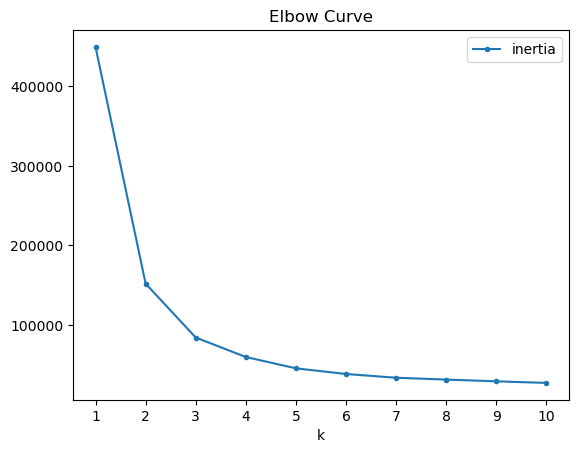

In [21]:
# Plot the elbow curve
df_elbow.plot(kind="line", x='k', y='inertia', title='Elbow Curve', style=".-", xticks=k)

##  Apply the KMeans Algorithm
---
### Use Kmeans to cluster data

In [22]:
# Define the model with 3 clusters
model = KMeans(n_clusters=3, n_init="auto", random_state=0)

# Fit the model
model.fit(ccinfo_df)

# Make predictions
model_3 = model.predict(ccinfo_df)

# Create a copy of the preprocessed data
predictions_df = ccinfo_df.copy()

# Add a class column with the labels
predictions_df['segments'] = model_3

<Axes: title={'center': 'Customer Seg'}, xlabel='limit_bal', ylabel='age'>

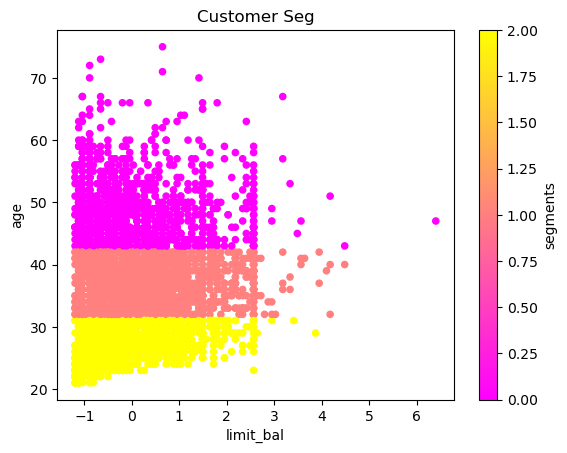

In [27]:
# Plot the clusters
predictions_df.plot(kind="scatter", x='limit_bal', y='age', 
                    title='Customer Seg', 
                    c='segments', colormap='spring')